# Data Normalization & Schema Design

## Normalization Strategy
This notebook transforms the flat CSV structure into a **relational schema** optimized for PostgreSQL. The normalization process reduces data redundancy and prepares the dataset for both **OLTP** (PostgreSQL) and **OLAP** (Power BI) workloads.

In [833]:
import pandas as pd

In [834]:
df = pd.read_csv('transformed_data/final_data.csv')

In [835]:
df.columns

Index(['price_total', 'room_type', 'is_shared_room', 'is_private_room',
       'max_guests', 'is_superhost', 'is_multi_listing', 'is_business_listing',
       'cleanliness_score', 'guest_satisfaction_score', 'num_bedrooms',
       'distance_city_center', 'distance_metro', 'attraction_index',
       'attraction_index_norm', 'restaurant_index', 'restaurant_index_norm',
       'longitude', 'latitude', 'city', 'day_type', 'district', 'state',
       'country_code', 'country_name', 'Crime_Index', 'Safety_Index',
       'Monthly_Average_Net_salary', 'Meal_at_Inexpensive_Restaurant',
       'Taxi_price_per_Km', 'Monthly_Basic_Utilities',
       'Monthly_Rent_One_Bedroom_CC', 'Monthly_Rent_One_Bedroom_OCC',
       'Monthly_Rent_Three_Bedroom_CC', 'Monthly_Rent_Three_Bedroom_OCC'],
      dtype='str')

In [836]:
cols_to_front = [ 'country_code', 'country_name','longitude', 'latitude', 'city', 'day_type', 'district', 'state','guest_satisfaction_score', 'distance_city_center', 'distance_metro','num_bedrooms',]
cols = cols_to_front + [col for col in df.columns if col not in cols_to_front]
df = df[cols]


## Room Table

In [837]:
room = df[['longitude', 'latitude', 'distance_city_center', 'distance_metro', 'num_bedrooms', 'max_guests']]

Drop duplicates

In [838]:
room.drop_duplicates(subset=['longitude', 'latitude'], inplace=True)
room = room.reset_index(drop=True)

Add room_id

In [839]:
room['room_id'] = range(1, len(room)+1)

Merge to add room_id

In [840]:
df = pd.merge(
    df,
    room,
    on=['longitude', 'latitude'],
    how='inner'
).reset_index(drop=True)

Drop longitude, latitude from room

In [841]:
room.drop(columns=['longitude', 'latitude'], inplace=True)

check room data

In [842]:
room['max_guests'] = room['max_guests'].astype(int)
room.dtypes

distance_city_center    float64
distance_metro          float64
num_bedrooms              int64
max_guests                int64
room_id                   int64
dtype: object

## city table

In [843]:
city = df['city']

Drop duplicates

In [844]:
city = city.drop_duplicates()
city = city.reset_index(drop=True)
city = pd.DataFrame(city)

Add id

In [845]:
city['city_id'] = range(1, len(city)+1)
room.dtypes

distance_city_center    float64
distance_metro          float64
num_bedrooms              int64
max_guests                int64
room_id                   int64
dtype: object

Merge with df

In [846]:
df = pd.merge(
    df,
    city,
    on='city',
    how='left'
).reset_index(drop=True)   

In [847]:
df.columns

Index(['country_code', 'country_name', 'longitude', 'latitude', 'city',
       'day_type', 'district', 'state', 'guest_satisfaction_score',
       'distance_city_center_x', 'distance_metro_x', 'num_bedrooms_x',
       'price_total', 'room_type', 'is_shared_room', 'is_private_room',
       'max_guests_x', 'is_superhost', 'is_multi_listing',
       'is_business_listing', 'cleanliness_score', 'attraction_index',
       'attraction_index_norm', 'restaurant_index', 'restaurant_index_norm',
       'Crime_Index', 'Safety_Index', 'Monthly_Average_Net_salary',
       'Meal_at_Inexpensive_Restaurant', 'Taxi_price_per_Km',
       'Monthly_Basic_Utilities', 'Monthly_Rent_One_Bedroom_CC',
       'Monthly_Rent_One_Bedroom_OCC', 'Monthly_Rent_Three_Bedroom_CC',
       'Monthly_Rent_Three_Bedroom_OCC', 'distance_city_center_y',
       'distance_metro_y', 'num_bedrooms_y', 'max_guests_y', 'room_id',
       'city_id'],
      dtype='str')

## city_metrics table

In [848]:
city_metrics = df.iloc[:, 21:]

In [849]:
city_metrics

,attraction_index,attraction_index_norm,restaurant_index,restaurant_index_norm,Crime_Index,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,distance_city_center_y,distance_metro_y,num_bedrooms_y,max_guests_y,room_id,city_id
0,78.690379,4.166708,98.253896,6.846473,25.7,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,5.022964,2.539380,1,2.0,1,1
1,631.176378,33.421209,837.280757,58.342928,25.7,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,0.488389,0.239404,1,4.0,2,1
2,75.275877,3.985908,95.386955,6.646700,25.7,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,5.748312,3.651621,1,2.0,3,1
3,493.272534,26.119108,875.033098,60.973565,25.7,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,0.384862,0.439876,2,4.0,4,1
4,552.830324,29.272733,815.305740,56.811677,25.7,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,0.544738,0.318693,1,2.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,219.402478,15.712158,438.756874,10.604584,28.4,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,0.530181,0.135447,3,6.0,30125,10
51703,204.970121,14.678608,342.182813,8.270427,28.4,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,0.810224,0.100844,1,2.0,29717,10
51704,169.073402,12.107921,282.296424,6.822996,28.4,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,0.994039,0.202537,1,2.0,29718,10
51705,109.236574,7.822803,158.563398,3.832416,28.4,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,3.044093,0.287442,1,2.0,29686,10


In [850]:
city_metrics.drop(columns=['room_id', 'num_bedrooms_y', 'max_guests_y', 'distance_city_center_y','distance_metro_y'], inplace =True)
city_metrics.columns


Index(['attraction_index', 'attraction_index_norm', 'restaurant_index',
       'restaurant_index_norm', 'Crime_Index', 'Safety_Index',
       'Monthly_Average_Net_salary', 'Meal_at_Inexpensive_Restaurant',
       'Taxi_price_per_Km', 'Monthly_Basic_Utilities',
       'Monthly_Rent_One_Bedroom_CC', 'Monthly_Rent_One_Bedroom_OCC',
       'Monthly_Rent_Three_Bedroom_CC', 'Monthly_Rent_Three_Bedroom_OCC',
       'city_id'],
      dtype='str')

In [851]:
city_metrics.drop_duplicates(subset='city_id', inplace=True)
city_metrics.reset_index(inplace=True)
city_metrics.drop(columns='index', inplace=True)
city_metrics['city_metrics_id'] = range(1, len(city_metrics)+1)
city_metrics

,attraction_index,attraction_index_norm,restaurant_index,restaurant_index_norm,Crime_Index,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,city_id,city_metrics_id
0,78.690379,4.166708,98.253896,6.846473,25.7,74.3,4502.10,20.50,3.00,262.00,2178.68,1701.26,3725.50,2785.29,1,1
1,55.348572,2.086871,78.778377,5.915160,55.2,44.8,1164.49,15.00,0.95,184.56,614.42,519.21,1142.70,946.39,2,2
2,526.469420,17.942927,915.587083,20.154890,51.9,48.1,2102.82,15.00,1.86,159.12,1398.59,1061.18,2162.90,1684.62,3,3
3,105.063708,16.019042,148.941114,30.710638,44.5,55.5,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45,4,4
4,404.404677,24.116552,893.477343,67.656853,33.9,66.1,1410.60,10.47,1.15,134.93,733.71,557.83,1412.20,1047.05,5,5
5,74.230170,2.450656,176.868292,7.910210,32.6,67.4,1304.65,13.75,0.90,137.93,1387.50,1036.00,2502.27,1633.33,6,6
6,209.632578,14.571793,467.597522,8.372724,55.6,44.4,4260.76,23.01,2.85,333.23,2788.44,2029.85,4402.56,3416.39,7,7
7,518.478947,25.239380,1218.662228,71.608028,58.0,42.0,3305.14,15.00,1.50,238.30,1394.79,1039.17,3088.46,2145.00,8,8
8,281.163932,6.230648,697.727246,15.191486,47.3,52.7,1863.90,15.00,1.50,187.37,1280.45,820.59,2353.33,1541.67,9,9
9,118.646831,8.496979,185.096720,4.424871,28.4,71.6,3135.20,18.25,1.90,291.20,1082.80,763.71,2063.57,1302.78,10,10


In [852]:
city_metrics.dtypes

attraction_index                  float64
attraction_index_norm             float64
restaurant_index                  float64
restaurant_index_norm             float64
Crime_Index                       float64
Safety_Index                      float64
Monthly_Average_Net_salary        float64
Meal_at_Inexpensive_Restaurant    float64
Taxi_price_per_Km                 float64
Monthly_Basic_Utilities           float64
Monthly_Rent_One_Bedroom_CC       float64
Monthly_Rent_One_Bedroom_OCC      float64
Monthly_Rent_Three_Bedroom_CC     float64
Monthly_Rent_Three_Bedroom_OCC    float64
city_id                             int64
city_metrics_id                     int64
dtype: object

In [853]:
city_metrics = city_metrics.rename(columns={
    'Crime_Index': 'crime_index',
    'Safety_Index': 'safety_index',
    'Monthly_Average_Net_salary': 'monthly_avg_net_salary',
    'Meal_at_Inexpensive_Restaurant': 'meal_inexpensive_restaurant',
    'Taxi_price_per_Km': 'taxi_price_per_km',
    'Monthly_Basic_Utilities': 'monthly_basic_utilities',
    'Monthly_Rent_One_Bedroom_CC': 'monthly_rent_1br_city_center',
    'Monthly_Rent_One_Bedroom_OCC': 'monthly_rent_1br_outside_center',
    'Monthly_Rent_Three_Bedroom_CC': 'monthly_rent_3br_city_center',
    'Monthly_Rent_Three_Bedroom_OCC': 'monthly_rent_3br_outside_center'
})


In [854]:
city_metrics = city_metrics.round(2)

## state

In [855]:
state = df['state']
state.drop_duplicates(inplace=True)
state = state.reset_index()
state = state.drop(columns='index')
state['state_id'] = range(1, len(state)+1)

In [856]:
state

,state,state_id
0,North Holland,1
1,Attica,2
2,Catalonia,3
3,Berlin,4
4,Brandenburg,5
5,Budapest,6
6,Pest,7
7,Lisbon,8
8,Setubal,9
9,England,10


In [857]:
df = pd.merge(
    df,
    state,
    on='state',
    how='inner'
)

## district

In [858]:
district = df['district']
district.drop_duplicates(inplace=True)
district = district.reset_index()
district = district.drop(columns='index')
district['district_id'] = range(1, len(district)+1)

In [859]:
df = pd.merge(
    df,
    district,
    on='district',
    how='inner'
)

## country

In [860]:
country = df[['country_name', 'country_code']]
country.drop_duplicates(inplace=True)
country = country.reset_index()
country = country.drop(columns='index')
country['country_id'] = range(1, len(country)+1)

In [861]:
df = pd.merge(
    df,
    country,
    on='country_name',
    how='inner'
)

## location

In [862]:
location = df[['room_id', 'city_id', 'state_id', 'district_id','country_id', 'longitude', 'latitude']]
location.drop_duplicates(inplace=True)
location = location.reset_index()
location = location.drop(columns='index')
location['location_id'] = range(1, len(location)+1)

## room_list

In [863]:
room_list = df[['day_type', 'guest_satisfaction_score', 'price_total',
                   'is_shared_room', 'is_superhost', 'is_multi_listing', 'is_business_listing',
                   'cleanliness_score','room_type', 'room_id']]
room_list['room_list_id'] = range(1, len(room_list)+1)

### Column Expansion Details

| Stage | Column Count | What Was Added |
|-------|-------------|----------------|
| **Raw CSVs** | 20 | Base listing attributes (price, room_type, ratings, coordinates) |
| **+Geographic** | 23 | Reverse geocoded fields (district, state, country_code, country_name) |
| **+Economic** | 27 | Numbeo scraped data (salaries, rent, utilities, meal costs, taxi prices) |
| **+Engineered** | **36** | Derived metrics (log_price, price_per_guest, attraction_index, restaurant_index, normalized fields) |

**Final schema**: 36 columns across 8 normalized tables (PostgreSQL) 

***************************************************************************

# 3NF

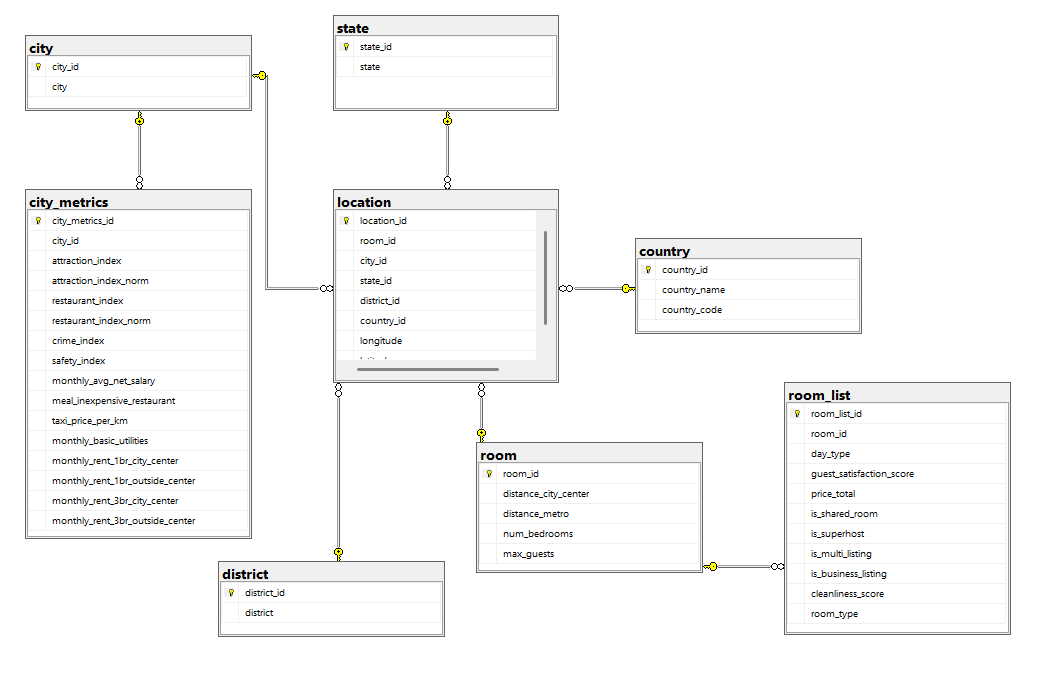

## Save Data

In [864]:
room.to_csv('Database_data/room.csv',index=False)
room_list.to_csv('Database_data/room_list.csv',index=False)
location.to_csv('Database_data/location.csv',index=False)
city.to_csv('Database_data/city.csv',index=False)
city_metrics.to_csv('Database_data/city_metrics.csv',index=False)
state.to_csv('Database_data/state.csv',index=False)
country.to_csv('Database_data/country.csv',index=False)
district.to_csv('Database_data/district.csv',index=False)